<a href="https://colab.research.google.com/github/ayarelif/Car-Accident-in-USA/blob/master/Elif_Ayar_Bulint_In_Project_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load The Datasets

In [ ]:
#Load the data first
import pandas as pd
import numpy as np

In [ ]:
train=pd.read_csv('Train.csv',index_col=0)
val=pd.read_csv('Val.csv',index_col=0)
test=pd.read_csv('Test.csv',index_col=0)

In [ ]:
train.shape,val.shape,test.shape

((17392, 47), (8697, 47), (8784, 47))

In [ ]:
train.columns

Index(['Source', 'TMC', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Severity_of_accident', 'year_recorded', 'month_recorded',
       'day_recorded', 'diff_hours', 'diff_minutes'],
      dtype='object')

## Permutation Importance


Permutation importance is another criteria to work on the features because these columns do not really have impact on dataset to predict dataset. Thus, determing the feature importance and idetifying the columns, I will drop them from dataset. Thus, that will help to run my dataset faster.

In [ ]:
  !pip install category_encoders==2.*

     |████████████████████████████████| 81kB 2.2MB/s 


In [ ]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
target='Severity_of_accident'
features=train.columns.drop([target])
X_train=train[features]
y_train=train[target]
X_val=val[features]
y_val=val[target]

In [ ]:
X_train.shape,X_val.shape

((17392, 46), (8697, 46))

In [ ]:
# First do random forest classifier
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
!pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


In [ ]:
#load eli5
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=10,
    random_state=100)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [ ]:
feature_names = X_val.columns.tolist()

In [ ]:
# 2. Display permutation importances
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=feature_names)

Weight,Feature
0.0361 ± 0.0034,Number
0.0262 ± 0.0041,Traffic_Signal
0.0225 ± 0.0041,Side
0.0213 ± 0.0026,TMC
0.0177 ± 0.0045,Source
0.0171 ± 0.0054,Start_Lng
0.0154 ± 0.0045,Street
0.0127 ± 0.0024,County
0.0083 ± 0.0026,Start_Lat
0.0076 ± 0.0036,Distance(mi)


Permutation importance shows that Bump, No_exit, Railway, Give_way, month_recorded, Traffic_calming, Amenity_Roundabout do not have really impact on the models

In [ ]:
train.columns

Index(['Source', 'TMC', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Severity_of_accident', 'year_recorded', 'month_recorded',
       'day_recorded', 'diff_hours', 'diff_minutes'],
      dtype='object')

In [ ]:
#Arrange the  features again
new_columns_name=['Source', 'TMC', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Crossing',
       'Junction', 'Station',
       'Stop', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
      'year_recorded',
       'day_recorded', 'diff_hours', 'diff_minutes']

In [ ]:
X_train=train[new_columns_name]
X_val=val[new_columns_name]
X_test=test[new_columns_name]
y_test=test[target]

In [ ]:
# Shape
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((17392, 38), (17392,), (8697, 38), (8697,), (8784, 38), (8784,))

Looks good.

# Exploratory Data Analysis

The train set is a good sample set to represent the whole dataset, and I will use the train set to make predictive modeling. However, I would like to see relationship between target "severity_of_accident" with some features and make visualization.

First, I want to see distribution of car accidents over 49 states and how serious car accidents associated with conditions are. It is less severe or high severe

In [ ]:
# Load the sklearn 
from sklearn.model_selection import train_test_split

In [ ]:
# I will split the data in order to provide smaller data set observation. This will be sample dataset from train

train_sample, train_sample_2= train_test_split(train, train_size=0.50, test_size=0.50, 
                              stratify=train['Severity_of_accident'], random_state=42)

In [ ]:
train_sample.shape

(8696, 47)

In [ ]:
train_sample=train_sample[["Start_Lat","Start_Lng","City","State", "Severity_of_accident"]]
train_sample.head()

,Start_Lat,Start_Lng,City,State,Severity_of_accident
1441294,39.994480,-75.191933,Philadelphia,PA,1
1102554,33.813122,-84.545700,Mableton,GA,1
2044618,37.522041,-77.271172,Sandston,VA,2
3050064,44.901520,-93.065470,Saint Paul,MN,1
1916781,39.748081,-75.553986,Wilmington,DE,1


In [ ]:
train_sample['Start_Lat'].dtype

dtype('float64')

In [ ]:
#installing chat studio to ebded tge code in my post
!pip install chart_studio

     |████████████████████████████████| 71kB 2.1MB/s 


In [ ]:
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

In [ ]:
Username = 'elif_a'
api_key = 'b9ugAa2M5ioR1LgaiNJw'

chart_studio.tools.set_credentials_file(username=Username, api_key=api_key)

In [ ]:

import plotly.express as px

fig = px.scatter_mapbox(train_sample, lat="Start_Lat", lon="Start_Lng", hover_name="City", hover_data=["State", "Severity_of_accident"],
                        color_discrete_sequence=["fuchsia"], zoom=4, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [ ]:
py.plot(fig, filename = 'Car_Accident_US', auto_open=True)

'https://plotly.com/~elif_a/104/'

According to feature importances, traffic signal and side has an important impact on severity of car accidents. 

In [ ]:
print(train['Traffic_Signal'].unique())

[False  True]


In [ ]:
print(train['Side'].unique())

['R' 'L']


In [ ]:
# let's create a new data only covers highly rated weather conditions and others

new_1=train[train['Severity_of_accident']==1]
new_2=train[train['Severity_of_accident']==2]

In [ ]:
#only create with Traffic_Signal conditions
new_sample_1=new_1[['Severity_of_accident','Traffic_Signal']]
new_sample_2=new_2[['Severity_of_accident','Traffic_Signal' ]]
new_sample_1.head()

,Severity_of_accident,Traffic_Signal
1694241,1,False
920744,1,False
2572739,1,False
1578836,1,False
661670,1,False


In [ ]:
#Top number of weather conditions
new_sample_1['Traffic_Signal'].value_counts().sort_values(ascending=False)

False    9142
True     2750
Name: Traffic_Signal, dtype: int64

In [ ]:
#Top number of weather conditions
new_sample_2['Traffic_Signal'].value_counts().sort_values(ascending=False)

False    5149
True      351
Name: Traffic_Signal, dtype: int64

In [ ]:
import plotly
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:


labels =['False','True']

# Create subplots: use 'domain' type for Pie subplot
fig_2= make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig_2.add_trace(go.Pie(labels=labels, values=[9142, 2750], name="Low Severity of Car Accident"),
              1, 1)
fig_2.add_trace(go.Pie(labels=labels, values=[5149, 351], name="High Severity of Car Accident"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig_2.update_traces(hole=.4, hoverinfo="label+percent+name")

fig_2.update_layout(
    title_text="Traffic_Signal Factor",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Low Severity', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='High Severity', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig_2.show()

In [ ]:
py.plot(fig_2, filename = 'Traffic_sign_3', auto_open=True)

'https://plotly.com/~elif_a/109/'

Year recorded and state distribution are also important features as well

In [ ]:
# let's look at the mose confirmed accident cases based on the State

In [ ]:
train['State'].value_counts().head(15)

CA    3990
TX    1680
FL    1341
SC     823
NC     822
NY     789
PA     518
MI     496
GA     495
VA     479
IL     466
OR     460
MN     410
AZ     380
WA     347
Name: State, dtype: int64

let's identify california as one state, and include north and south california in the same observation value

In [ ]:
CA=train[train['State']=="CA"]
SC=train[train['State']=="SC"]
NC=train[train['State']=="NC"]
TX=train[train['State']=="TX"]
FL=train[train['State']=="FL"]


In [ ]:
CA['Severity_of_accident'].value_counts()

1    2849
2    1141
Name: Severity_of_accident, dtype: int64

In [ ]:
TX['Severity_of_accident'].value_counts()

1    1199
2     481
Name: Severity_of_accident, dtype: int64

In [ ]:
FL['Severity_of_accident'].value_counts()

1    886
2    455
Name: Severity_of_accident, dtype: int64

In [ ]:
SC['Severity_of_accident'].value_counts()

1    671
2    152
Name: Severity_of_accident, dtype: int64

In [ ]:
NC['Severity_of_accident'].value_counts()

1    680
2    142
Name: Severity_of_accident, dtype: int64

Most cases are in California, Texas, Florida, South California, North California  so let's look at it closely


In [ ]:
import plotly.express as px


severity=['Low','High']

fig_3 = go.Figure(data=[
    go.Bar(name='California', x=severity, y=[2849, 1141]),
    go.Bar(name='Texas', x=severity, y=[1199, 481]),
    go.Bar(name='Florida', x=severity, y=[886, 455]),
    go.Bar(name='South California', x=severity, y=[671,152]),
    go.Bar(name='North California', x=severity, y=[680,142])
])
# Change the bar mode
fig_3.update_layout(barmode='group')
fig_3.show()

In [ ]:
py.plot(fig_3, filename = 'car_severity', auto_open=True)

'https://plotly.com/~elif_a/111/'

# Apply Predictive Models
I want to evaluate four predictive models and choose one of them as a best predictive models based on accurancy score. Before starting any models, I will identified based line, then I will identifies train, val, and test targets and features sets.

In [ ]:
#Load the data first
import pandas as pd
import numpy as np

In [ ]:
#Shape
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((17392, 38), (17392,), (8697, 38), (8697,), (8784, 38), (8784,))

What is the baseline accuracy if we guessed the majority class for every prediction?

In [ ]:
y_train.value_counts(normalize=True)


1    0.683763
2    0.316237
Name: Severity_of_accident, dtype: float64

thus, baseline is 0.683742

# LogisticRegression

Let's try first Logistic Regression

In [ ]:
#Load the data
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Create pipeline
pipeline_2 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)
)

# Fit on train
pipeline_2.fit(X_train, y_train)

# Score on validation
print ('Validation Accruacy', pipeline_2.score(X_val, y_val))

Validation Accruacy 0.7090950902610096


Accuracy Score is 0.709095. This is better score than baseline score

#Decision Tree

Second, I want to apply decision tree

In [ ]:
#Load the data
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipeline_3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(min_samples_leaf = 18,random_state=42)
)

# Fit on train
pipeline_3.fit(X_train, y_train)

# Score on validation
print ('Train Accuracy', pipeline_3.score(X_train, y_train))
print ('Validation Accuracy', pipeline_3.score(X_val, y_val))

Train Accuracy 0.8551057957681693
Validation Accuracy 0.736230884212947


The score is better than Logistic Regration model has. Let's see decision tree graphic

In [ ]:
y_train.nunique()


2

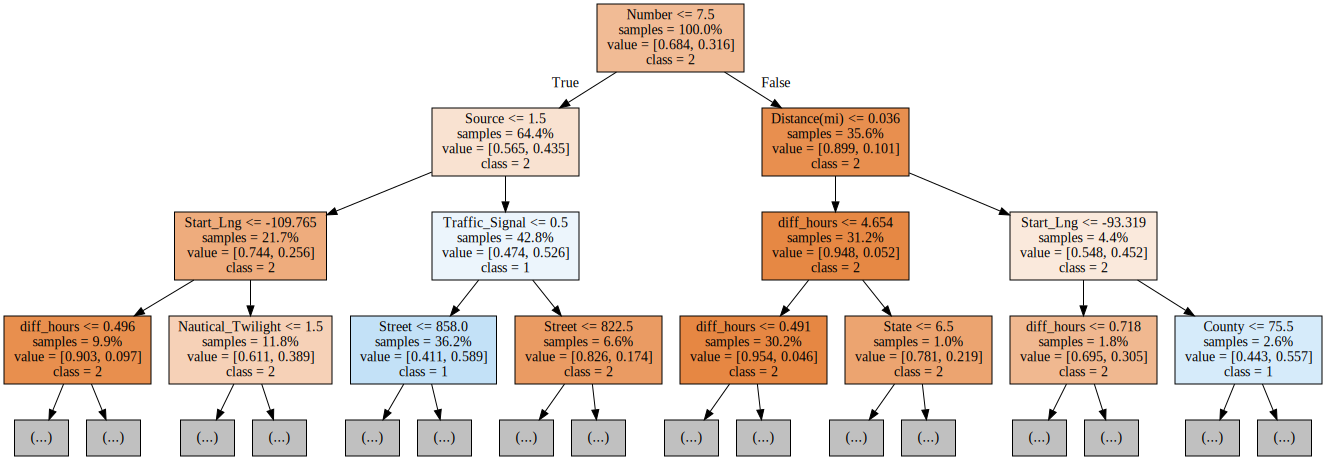

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

tree=pipeline_3.named_steps['decisiontreeclassifier']

dot_data=export_graphviz(
    tree,
    out_file=None,
    max_depth=3,
    feature_names=X_train.columns,
    class_names=y_train.unique().astype(str),
    filled=True,
    impurity=False,
    proportion=True
)
graphviz.Source(dot_data)

Decision Tree does not have a strong coefficent equation because of categorical type of data. Thus, in order to identify the importance of features, decision tree use the parameter .feature_importance_. Feature importances are always positive numbers, they don't have a sign. Feature importance measures how early & often a feature is used for the tree's "branching" decisions

In [ ]:
import matplotlib.pyplot as plt


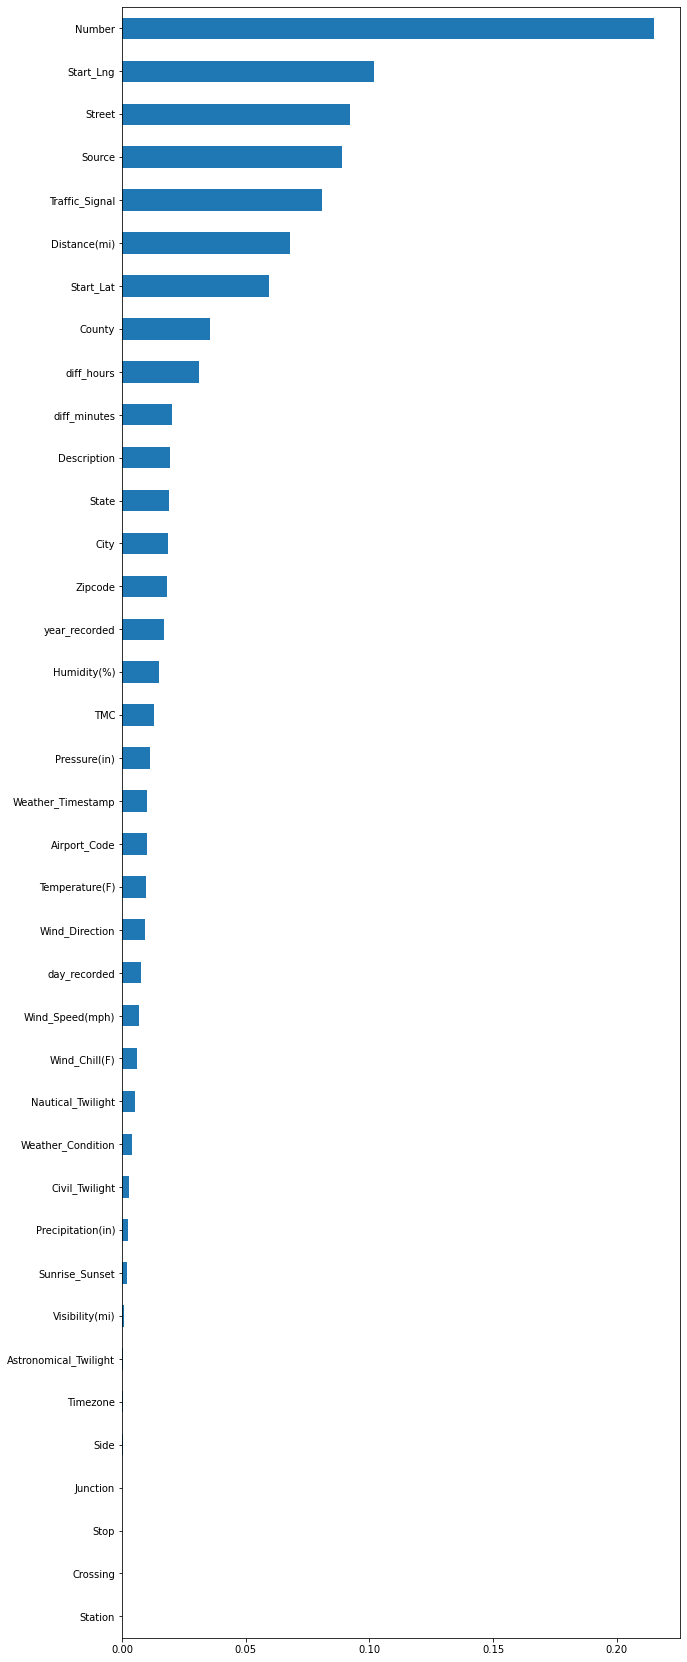

In [ ]:
encoder = pipeline_3.named_steps['ordinalencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(tree.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

Thus, importance feature for decision tree is little dfference than permutation importance. However, this does not really matter becuase every model has its own feature importance important. Thus, the most important factor is street numbers. Its heights is almost double compared to other important features. Then it has been followed  by start Long, Source, street, and traffic_sign.

# Random Forest

In [ ]:
# Load the random forest
from sklearn.ensemble import RandomForestClassifier


In [ ]:
pipeline_4=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(n_estimators=100,random_state=100,n_jobs=-1)
)

In [ ]:
# Fit the pipeline
pipeline_4.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Source', 'TMC', 'Description', 'Number',
                                      'Street', 'Side', 'City', 'County',
                                      'State', 'Zipcode', 'Timezone',
                                      'Airport_Code', 'Weather_Timestamp',
                                      'Temperature(F)', 'Wind_Chill(F)',
                                      'Humidity(%)', 'Pressure(in)',
                                      'Visibility(mi)', 'Wind_Direction',
                                      'Wind_Speed(mph)', 'Precipitation(in)',
                                      'Weather_Condit...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_sam

In [ ]:
print('Validation Accuracy is ',pipeline_4.score(X_train,y_train)  )
print('Validation Accuracy is ',pipeline_4.score(X_val,y_val)  )

Validation Accuracy is  1.0
Validation Accuracy is  0.7726802345636427


This score is better than decision tree. Hyperparamater has little effect on Random forest, but I want to apply RandomSearchCV() function to make sure. Let's check.
.

# RandomForest with Hyperparameter Optimization

In [ ]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# make pipeline

pipeline_5 = make_pipeline(
     ce.OrdinalEncoder(), 
     SimpleImputer(), 
     RandomForestClassifier(random_state=42)
)

In [ ]:
from scipy.stats import randint, uniform
hyperparam_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20,25,30,35,40,45,50, None], 
    'randomforestclassifier__max_features': uniform(0, 1), 
}

In [ ]:
#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
search=RandomizedSearchCV(
    pipeline_5,
    param_distributions=hyperparam_distributions,
    n_iter=5,
    cv=10,
    scoring='accuracy',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

In [ ]:
search.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.6min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=None,
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=None,
                                                             return_df=True,
                                                             verbose=0)),
                                             ('simpleimputer',
                                              SimpleImputer(add_indicator=False,
                                                            copy=True,
                                                            fill_value=None,

In [ ]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', search.best_score_)

Best hyperparameters {'randomforestclassifier__max_depth': 50, 'randomforestclassifier__max_features': 0.13081494373026126, 'randomforestclassifier__n_estimators': 151, 'simpleimputer__strategy': 'mean'}
Cross-validation MAE 0.7631674300859921


Thus, cross validation is 0.76316. It is better

In [ ]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').T

,3,0,4,1,2
mean_fit_time,8.23363,53.9924,9.96407,41.2073,19.2544
std_fit_time,0.0462628,0.236672,0.164485,0.221674,0.210722
mean_score_time,0.178334,0.238994,0.182383,0.142164,0.103354
std_score_time,0.0172627,0.00512252,0.0365061,0.00448996,0.00403458
param_randomforestclassifier__max_depth,50,15,20,10,30
param_randomforestclassifier__max_features,0.130815,0.489904,0.136634,0.938633,0.903749
param_randomforestclassifier__n_estimators,151,321,157,174,53
param_simpleimputer__strategy,mean,median,median,median,mean
params,"{'randomforestclassifier__max_depth': 50, 'ran...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 20, 'ran...","{'randomforestclassifier__max_depth': 10, 'ran...","{'randomforestclassifier__max_depth': 30, 'ran..."
split0_test_score,0.758046,0.782759,0.763218,0.763218,0.746552


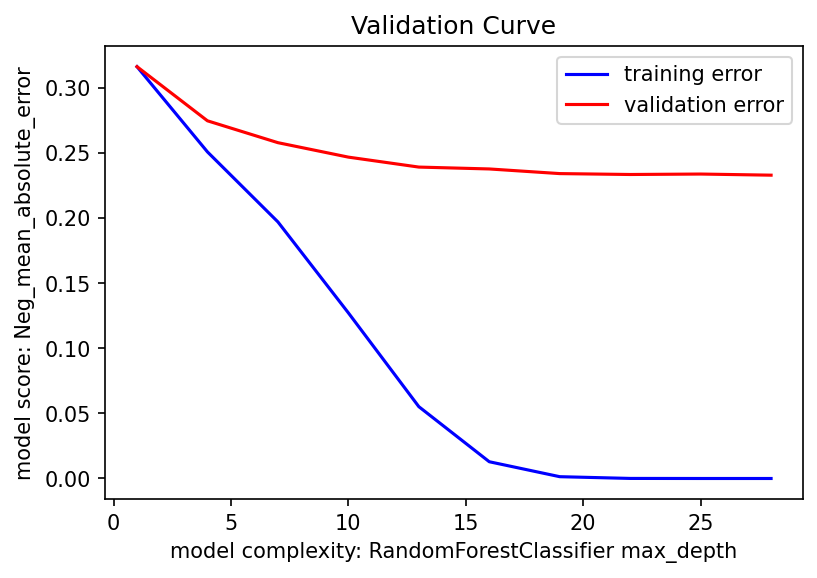

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=151,random_state=42)
)

depth = range(1, 30, 3)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='randomforestclassifier__max_depth', 
    param_range=depth, scoring='neg_mean_absolute_error', 
    cv=10,
    n_jobs=-1
)

plt.figure(dpi=150)
plt.plot(depth, np.mean(-train_scores, axis=1), color='blue', label='training error')
plt.plot(depth, np.mean(-val_scores, axis=1), color='red', label='validation error')
plt.title('Validation Curve')
plt.xlabel('model complexity: RandomForestClassifier max_depth')
plt.ylabel('model score: Neg_mean_absolute_error')
plt.legend();

# XGBoost

In [ ]:
from xgboost import XGBClassifier 

pipeline_6=make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42,n_jobs=-1)
)

In [ ]:
pipeline_6.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Source', 'TMC', 'Description', 'Number',
                                      'Street', 'Side', 'City', 'County',
                                      'State', 'Zipcode', 'Timezone',
                                      'Airport_Code', 'Weather_Timestamp',
                                      'Temperature(F)', 'Wind_Chill(F)',
                                      'Humidity(%)', 'Pressure(in)',
                                      'Visibility(mi)', 'Wind_Direction',
                                      'Wind_Speed(mph)', 'Precipitation(in)',
                                      'Weather_Condit...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
               

In [ ]:
print('Validation Accuracy is ',pipeline_6.score(X_train,y_train)  )
print('Validation Accuracy is ',pipeline_6.score(X_val,y_val)  )

Validation Accuracy is  0.81192502299908
Validation Accuracy is  0.7399103139013453


In [ ]:
#fit_transform on train, transform on val
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model_1 = XGBClassifier(
    n_estimators=1000, 
    max_depth=5,      
    learning_rate=0.5,  
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model_1.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='error',
          early_stopping_rounds=50) 
 

[0]	validation_0-error:0.221941	validation_1-error:0.29332
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.208832	validation_1-error:0.280901
[2]	validation_0-error:0.202794	validation_1-error:0.266874
[3]	validation_0-error:0.196987	validation_1-error:0.256525
[4]	validation_0-error:0.19026	validation_1-error:0.261125
[5]	validation_0-error:0.187385	validation_1-error:0.26032
[6]	validation_0-error:0.182498	validation_1-error:0.255375
[7]	validation_0-error:0.179048	validation_1-error:0.25894
[8]	validation_0-error:0.177495	validation_1-error:0.271703
[9]	validation_0-error:0.174448	validation_1-error:0.267449
[10]	validation_0-error:0.171171	validation_1-error:0.262734
[11]	validation_0-error:0.168583	validation_1-error:0.278257
[12]	validation_0-error:0.166053	validation_1-error:0.277107
[13]	validation_0-error:0.162316	validation_1-error:0.275612

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print(" Accuracy Score:", 1- 0.23928)

 Accuracy Score: 0.7607200000000001


This is accuracy score and better than all others 

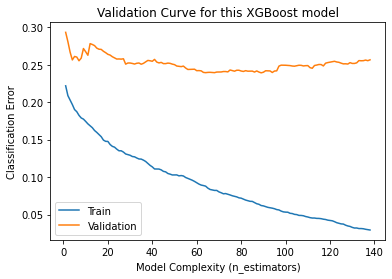

In [ ]:
results = model_1.evals_result()
train_error = results['validation_0']['error']
val_error = results['validation_1']['error']
epoch = list(range(1, len(train_error)+1))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.title('Validation Curve for this XGBoost model')

plt.legend();

In [ ]:
# I want to see permutation importance as well
permuter_1 = PermutationImportance(
    model_1,
    scoring='accuracy',
    n_iter=10,
    random_state=100)

permuter_1.fit(X_val_encoded, y_val)

PermutationImportance(cv='prefit',
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.5,
                                              max_delta_step=0, max_depth=5,
                                              min_child_weight=1, missing=None,
                                              n_estimators=1000, n_jobs=-1,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              seed=None, silent=None,
                   

In [ ]:
feature_names = X_val.columns.tolist()

# Partial Dependence  Plot

Based on permutation importance I want to see partial dependeces on the first 4 imortant features. Source, Number, start_Lg and Traffic_Signal

In [ ]:
 !pip install pdpbox

     |████████████████████████████████| 57.7MB 70kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=ee751a184052a48550561b58eb93b415d8e749acf308617ceab9acb6b2724031
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [ ]:
# Let's define the tools again and create a model without using pipeline

import category_encoders as ce
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#fit_transform on train, transform on val
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model_1 = XGBClassifier(
    n_estimators=1000, 
    max_depth=5,      
    learning_rate=0.5,  
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model_1.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='error',
          early_stopping_rounds=50) 
 

[0]	validation_0-error:0.221941	validation_1-error:0.29332
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.208832	validation_1-error:0.280901
[2]	validation_0-error:0.202794	validation_1-error:0.266874
[3]	validation_0-error:0.196987	validation_1-error:0.256525
[4]	validation_0-error:0.19026	validation_1-error:0.261125
[5]	validation_0-error:0.187385	validation_1-error:0.26032
[6]	validation_0-error:0.182498	validation_1-error:0.255375
[7]	validation_0-error:0.179048	validation_1-error:0.25894
[8]	validation_0-error:0.177495	validation_1-error:0.271703
[9]	validation_0-error:0.174448	validation_1-error:0.267449
[10]	validation_0-error:0.171171	validation_1-error:0.262734
[11]	validation_0-error:0.168583	validation_1-error:0.278257
[12]	validation_0-error:0.166053	validation_1-error:0.277107
[13]	validation_0-error:0.162316	validation_1-error:0.275612

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
features=X_val.columns
features

Index(['Source', 'TMC', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Crossing', 'Junction',
       'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'year_recorded',
       'day_recorded', 'diff_hours', 'diff_minutes'],
      dtype='object')

In [ ]:
X_val_pf=pd.DataFrame(X_val_encoded, columns=features)
X_val_pf.head(2)

,Source,TMC,Start_Lat,Start_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year_recorded,day_recorded,diff_hours,diff_minutes
1660600,2,2,29.809353,-95.447350,0.0,-1.0,1.0,-1.0,1,17.0,16.0,1,4530.0,1,64.0,-1.0,86.0,2.0,11,56.0,1.0,2,2.0,1.0,5.0,False,False,False,True,False,1,1,1,1,2018,19,0.746944,44.816667
810442,2,2,39.546116,-119.788116,0.0,-1.0,1.0,402.0,1,304.0,191.0,37,447.0,3,256.0,-1.0,70.0,47.0,51,-1.0,1.0,10,13.0,2.0,6.0,False,False,False,False,True,1,1,1,1,2019,9,0.936944,56.216667


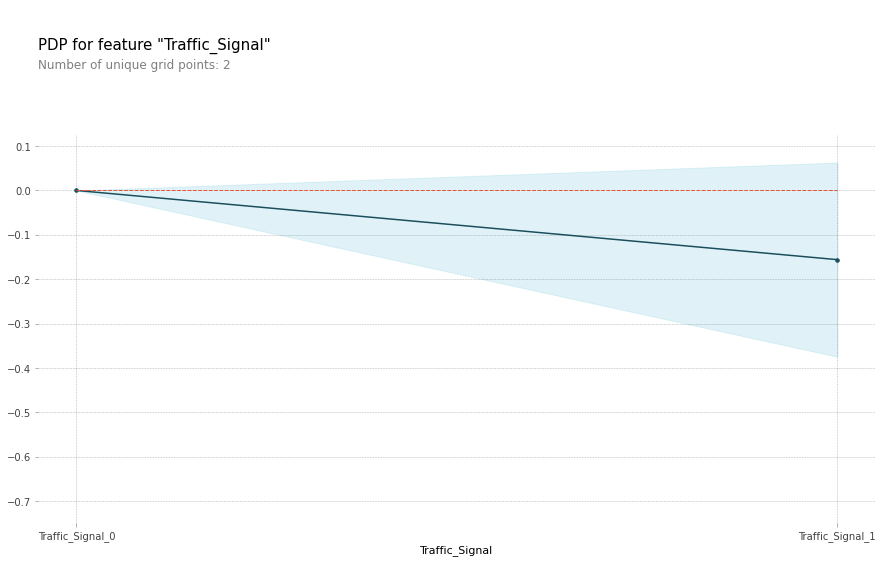

In [ ]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

from pdpbox import pdp
feature = 'Traffic_Signal'
pdp_dist = pdp.pdp_isolate(model=model_1, dataset=X_val_pf, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

Based on the graph, 

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [ ]:
features_1 = ['Traffic_Signal', 'diff_hours']

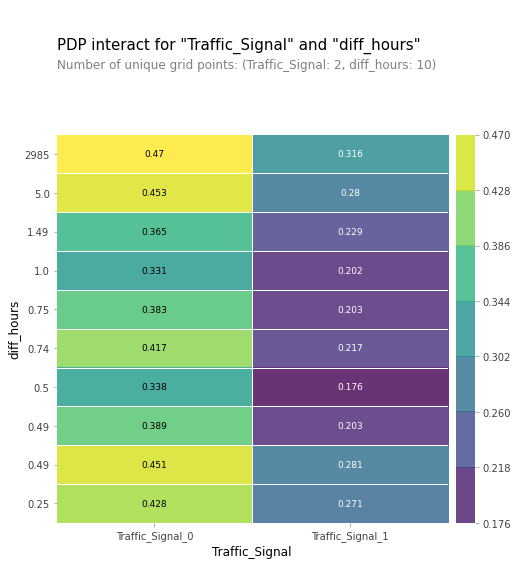

In [ ]:

interaction = pdp_interact(
    model=model_1, 
    dataset=X_val_pf, 
    model_features=features, 
    features=features_1
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features_1);

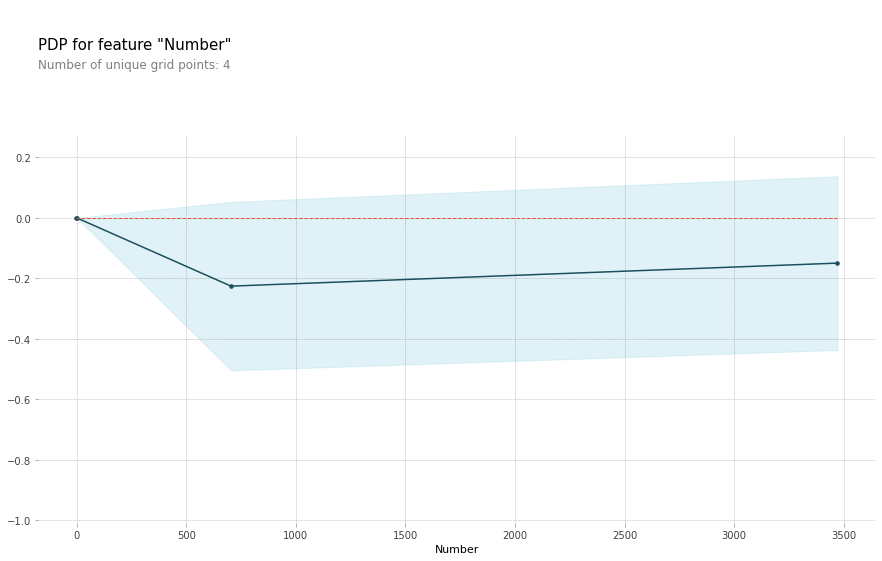

In [ ]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

from pdpbox import pdp
feature = 'Number'
pdp_dist = pdp.pdp_isolate(model=model_1, dataset=X_val_pf, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

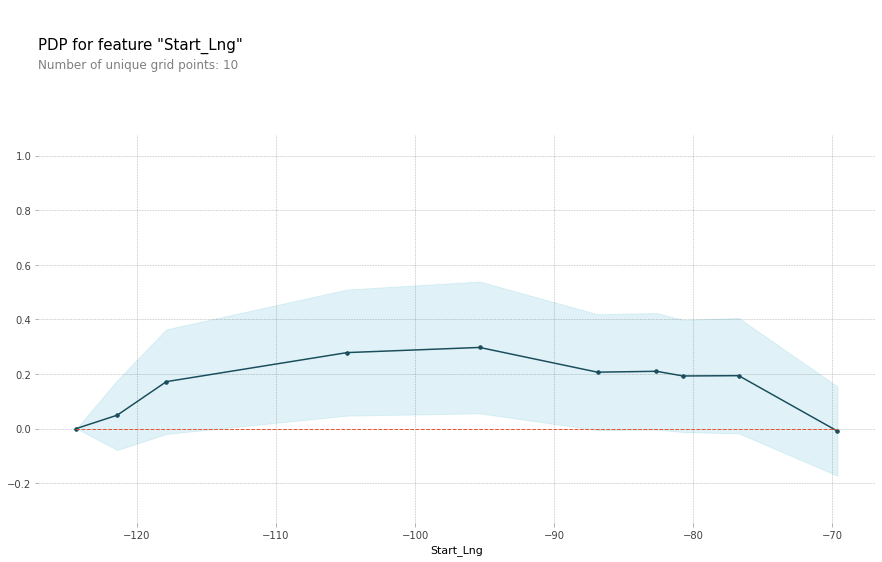

In [ ]:
from pdpbox import pdp
feature = 'Start_Lng'
pdp_dist = pdp.pdp_isolate(model=model_1, dataset=X_val_pf, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

#Shapley Value Plot

I will use gxboost

In [ ]:
from xgboost import XGBClassifier 
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)
X_train_pipeline = pipeline.fit_transform(X_train)
X_val_pipeline = pipeline.transform(X_val)

eval_set = [(X_train_pipeline, y_train), 
            (X_val_pipeline, y_val)]

model = XGBClassifier(
    n_estimators=1000, 
    max_depth=7,      
    learning_rate=0.5,  
    n_jobs=-1
)
model.fit(X_train_pipeline, y_train, eval_set=eval_set, eval_metric='error', 
          early_stopping_rounds=10)


[0]	validation_0-error:0.1944	validation_1-error:0.282511
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.18037	validation_1-error:0.288145
[2]	validation_0-error:0.169043	validation_1-error:0.285156
[3]	validation_0-error:0.165421	validation_1-error:0.276762
[4]	validation_0-error:0.160131	validation_1-error:0.273543
[5]	validation_0-error:0.153576	validation_1-error:0.283891
[6]	validation_0-error:0.146102	validation_1-error:0.279637
[7]	validation_0-error:0.139719	validation_1-error:0.272968
[8]	validation_0-error:0.138799	validation_1-error:0.270553
[9]	validation_0-error:0.127587	validation_1-error:0.265954
[10]	validation_0-error:0.122355	validation_1-error:0.267564
[11]	validation_0-error:0.119193	validation_1-error:0.25687
[12]	validation_0-error:0.11718	validation_1-error:0.257675
[13]	validation_0-error:0.115915	validation_1-error:0.256985


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Load joblip

In [ ]:
# First, get all of the features for one observation
row = X_test.iloc[[0]]
row

,Source,TMC,Start_Lat,Start_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Junction,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year_recorded,day_recorded,diff_hours,diff_minutes
1442105,MapQuest,201.0,34.144188,-79.770454,0.0,Accident on US-52 Irby St Southbound at US-301...,Missing,Freedom Blvd,R,Florence,Florence,SC,29505,US/Eastern,KFLO,2018-12-03 07:29:00,60.1,Missing,96.0,29.86,1.8,West,4.6,Missing,Clear,False,False,False,False,True,Day,Day,Day,Day,2018,3,0.744722,44.683333


In [ ]:
  !pip install shap

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
row_processed = pipeline.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' 
)

In [ ]:
feature_name=row.columns
feature_values=row.values[0]
feature_values

array(['MapQuest', '201.0', 34.144188, -79.770454, 0.0,
       'Accident on US-52 Irby St Southbound at US-301 Freedom Blvd.',
       'Missing', 'Freedom Blvd', 'R', 'Florence', 'Florence', 'SC',
       '29505', 'US/Eastern', 'KFLO', '2018-12-03 07:29:00', '60.1',
       'Missing', '96.0', '29.86', '1.8', 'West', '4.6', 'Missing',
       'Clear', False, False, False, False, True, 'Day', 'Day', 'Day',
       'Day', 2018, 3, 0.7447222222222222, 44.68333333333333],
      dtype=object)

In [ ]:
shaps=pd.Series(shap_values[0],zip(feature_name,feature_values))
shaps

(Source, MapQuest)                                                             0.276050
(TMC, 201.0)                                                                  -0.045006
(Start_Lat, 34.144188)                                                        -0.271808
(Start_Lng, -79.770454)                                                        0.283698
(Distance(mi), 0.0)                                                           -0.186895
(Description, Accident on US-52 Irby St Southbound at US-301 Freedom Blvd.)   -0.009952
(Number, Missing)                                                              0.744727
(Street, Freedom Blvd)                                                         1.118901
(Side, R)                                                                      0.005157
(City, Florence)                                                               0.050806
(County, Florence)                                                             0.090163
(State, SC)                     